# 🎯 EDA Hillstrom `tutorial`

<br>
<center>
    <a href="https://colab.research.google.com/github/maks-sh/scikit-uplift/blob/master/notebooks/EDA_Hillstrom_tutorial.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg">
    </a>
    <br>
    <b><a href="https://github.com/maks-sh/scikit-uplift/">SCIKIT-UPLIFT REPO</a> | </b>
    <b><a href="https://scikit-uplift.readthedocs.io/en/latest/">SCIKIT-UPLIFT DOCS</a> | </b>
    <b><a href="https://scikit-uplift.readthedocs.io/en/latest/user_guide/index.html">USER GUIDE</a></b>
    <br>
</center>

In [125]:
import sys

# install uplift library scikit-uplift and other libraries 
!{sys.executable} -m pip install scikit-uplift dill catboost

In [3]:
from matplotlib import pyplot as plt
from sklift.metrics import uplift_at_k
import seaborn as sns
import numpy as np
import pandas as pd

# 📝 Load dataset

We are going to use a Hillstrom dataset from the MineThatData [hosted](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html) in march 2008 by the president of this company Kevin Hillstrom.

MineThatData is a consulting company that helps CEO understand the complex relationship between Customers, Advertising, Products, Brands, and Channels.

### Data description

✏️ Dataset can be loaded from sklift.datasets module using fetch_hillstrom function.

Read more about dataset in the [api docs](https://www.uplift-modeling.com/en/latest/api/datasets/fetch_hillstrom.html).

This dataset contains 64,000 customers who last purchased within twelve months. The customers were involved in an e-mail test  

####  ✏️ Major columns:

- `conversion` - (binary): target. 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
- `visit` - (binary): target. 1/0 indicator, 1 = Customer visited website in the following two weeks.
- `spend` - (float): target. Actual dollars spent in the following two weeks.
- `segment` - (str): treatment. The e-mail campaign the customer received

Read more in the [docs](https://www.uplift-modeling.com/en/latest/api/datasets/fetch_hillstrom.html#hillstrom)

There are 3 types of targets (visit/conversion/spend) that we could get, it depends from the task of the customer. We should input target in the bracket when we download dataset from the library sklift

In [4]:
from sklift.datasets import fetch_hillstrom

# returns sklearn Bunch object
# with data, target, treatment keys
# data features (pd.DataFrame), target (pd.Series), treatment (pd.Series) values 
dataset = fetch_hillstrom()

In [5]:
print(f"Dataset type: {type(dataset)}\n")
print(f"Dataset features shape: {dataset.data.shape}")
print(f"Dataset target shape: {dataset.target.shape}")
print(f"Dataset treatment shape: {dataset.treatment.shape}")

Dataset type: <class 'sklearn.utils.Bunch'>

Dataset features shape: (64000, 8)
Dataset target shape: (64000,)
Dataset treatment shape: (64000,)


# 📝 EDA

In [6]:
dataset.data.head().append(dataset.data.tail())

,recency,history_segment,history,mens,womens,zip_code,newbie,channel
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel
63999,1,4) $350 - $500,472.82,0,1,Surburban,0,Web


In [7]:
#info about types and null cells in dataset
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.9+ MB


# 📄  Categorical data

In [8]:
cat_features = ['channel', 'zip_code', 'history_segment', 'newbie']

**Channel**

In [9]:
dataset.data.channel.unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

<AxesSubplot:>

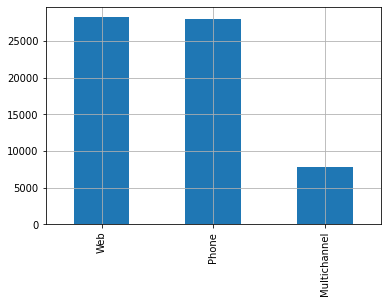

In [10]:
dataset.data.channel.value_counts().plot(kind = 'bar', grid=True)

**Zip code**

In [11]:
dataset.data.zip_code.unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

<AxesSubplot:>

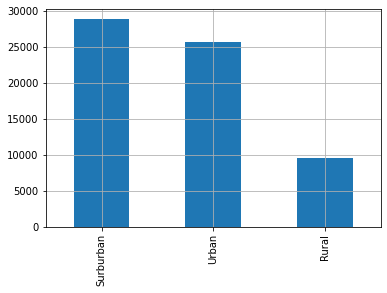

In [12]:
dataset.data.zip_code.value_counts().plot(kind = 'bar', grid=True)

**History segment**

In [13]:
dataset.data.history_segment.unique()

array(['2) $100 - $200', '3) $200 - $350', '5) $500 - $750',
       '1) $0 - $100', '6) $750 - $1,000', '4) $350 - $500',
       '7) $1,000 +'], dtype=object)

<AxesSubplot:>

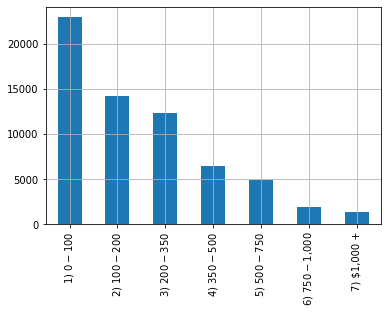

In [14]:
dataset.data.history_segment.value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

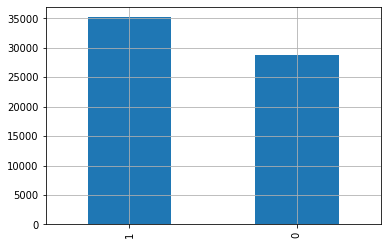

In [15]:
dataset.data.womens.value_counts().plot(kind = 'bar', grid=True)

<AxesSubplot:>

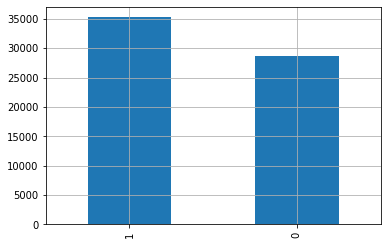

In [16]:
dataset.data.mens.value_counts().plot(kind = 'bar', grid=True)

In [17]:
dataset.data.womens.value_counts()

1    35182
0    28818
Name: womens, dtype: int64

In [18]:
dataset.data.groupby('womens').size()/dataset.data['womens'].count()*100

womens
0    45.028125
1    54.971875
dtype: float64

- `55%` - womens purchases
- `44%` - mens purchases

In [19]:
dataset.data.mens.value_counts()

1    35266
0    28734
Name: mens, dtype: int64

In [20]:
dataset.data.groupby('mens').size()/dataset.data['mens'].count()*100

mens
0    44.896875
1    55.103125
dtype: float64

- `55%` - mens purchases
- `44%` - womens purchases

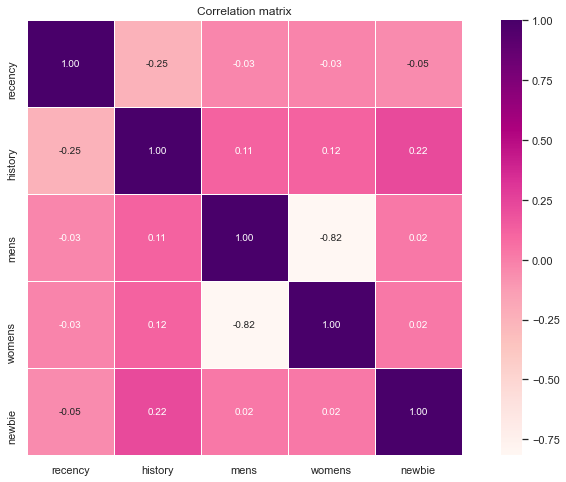

In [21]:
plt.figure(figsize = (14,8))

sns.set()
sns.heatmap(dataset.data.corr().round(3), annot=True, square = True, linewidths=.75, cmap='RdPu', fmt = '.2f',annot_kws = {"size": 10} )

plt.title('Correlation matrix')
plt.show()

- Womens and mens are in inverse correlation. I propose to make 1 column "gender" and merge.

- As we can see, there is high correlation between "history_segment" and "history". Could we merge it also and transform columns to numeric data?

# 📄 Numeric data

<AxesSubplot:>

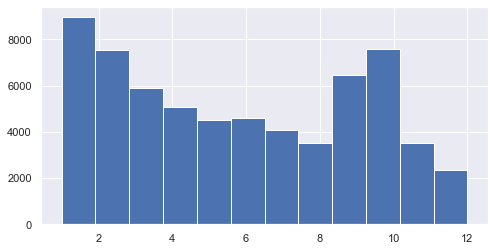

In [22]:
dataset.data.loc[:, 'recency'].hist(figsize=(8, 4), bins=12, grid=True)

In [23]:
dataset.data.history.value_counts()

29.99     7947
81.20        9
53.79        9
60.51        8
88.09        8
          ... 
200.53       1
234.76       1
239.91       1
99.85        1
738.50       1
Name: history, Length: 34833, dtype: int64

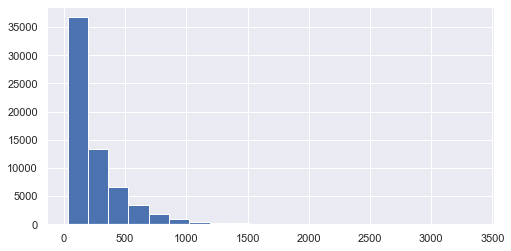

In [24]:
dataset.data.loc[:, 'history'].hist(figsize=(8, 4), bins=20, grid=True);

In [25]:
dataset.data['history_log'] = np.log(dataset.data['history'] + 1.1)

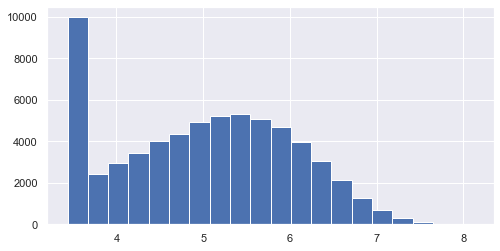

In [26]:
dataset.data.loc[:, 'history_log'].hist(figsize=(8, 4), bins=20, grid=True);

In [27]:
numeric_features = ['history_log', 'recency']

In [28]:
dataset.data.columns.to_list()

['recency',
 'history_segment',
 'history',
 'mens',
 'womens',
 'zip_code',
 'newbie',
 'channel',
 'history_log']

In [29]:
final_features = ['recency', 'history_segment', 'mens', 'womens', 'zip_code', 'newbie', 'channel', 'history_log']

# 🎯 Target data

Let's segment dataset data

In [30]:
dataset.treatment.head()

0    Womens E-Mail
1        No E-Mail
2    Womens E-Mail
3      Mens E-Mail
4    Womens E-Mail
Name: segment, dtype: object

In [31]:
dataset.treatment.unique()

array(['Womens E-Mail', 'No E-Mail', 'Mens E-Mail'], dtype=object)

<AxesSubplot:>

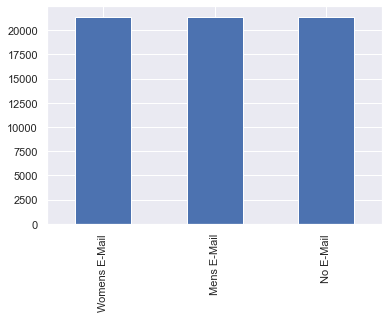

In [32]:
dataset.treatment.value_counts().plot(kind = 'bar', grid = 'True')

In [33]:
dataset.target.head()

0    0
1    0
2    0
3    0
4    0
Name: visit, dtype: int64

<AxesSubplot:>

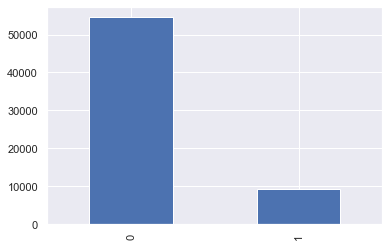

In [34]:
dataset.target.value_counts().plot(kind = 'bar')

Target is disbalanced

In [35]:
import pandas as pd 

pd.crosstab(dataset.treatment, dataset.target, normalize='index')

visit,0,1
segment,,
Mens E-Mail,0.817243,0.182757
No E-Mail,0.893833,0.106167
Womens E-Mail,0.848600,0.151400


In [36]:
dataset.target.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Treatment & Target')

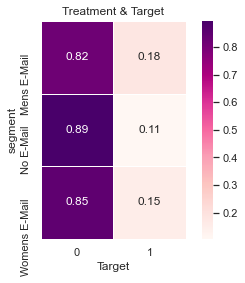

In [37]:
crosstab = pd.crosstab(dataset.treatment, dataset.target, normalize='index')
    
sns.heatmap(crosstab, annot=True, fmt=".2f", linewidths=1, square = True, cmap = 'RdPu')
plt.xlabel('Target')
plt.title("Treatment & Target")

There are two cases:
- `Womens E-mail - No E-mail`
- `Mens E-mail - No E-mail`

In our tutorial we perform with first. The second you could explore by yourself.

## Womens E-mail - No E-mail

In [38]:
# make treatment binary
treat_dict_womens = {
            'Womens E-Mail': 1,
            'No E-Mail': 0, 
            'Mens E-Mail': 0
            }
dataset.treatment_womens = dataset.treatment.map(treat_dict_womens)

<AxesSubplot:>

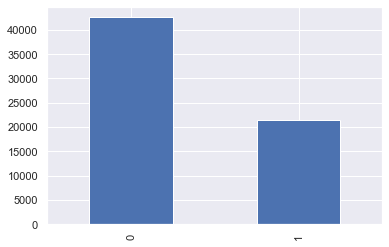

In [39]:
dataset.treatment_womens.value_counts().plot(kind = 'bar', grid = 'True')

In [40]:
stratify_cols = pd.concat([dataset.treatment_womens, dataset.target], axis=1)

In [41]:
stratify_cols.head(2)

,segment,visit
0,1,0
1,0,0


In [42]:
from sklearn.model_selection import train_test_split

stratify_cols = pd.concat([dataset.treatment_womens, dataset.target], axis=1)

X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split(
    dataset.data,
    dataset.treatment_womens,
    dataset.target,
    stratify=stratify_cols,
    test_size=0.3,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (44800, 9)
Validation shape: (19200, 9)


In [43]:
from sklift.models import ClassTransformation
from catboost import CatBoostClassifier

estimator = CatBoostClassifier(verbose=100, 
                               cat_features=cat_features,
                               random_state=42,
                               thread_count=1
                              )

ct_model = ClassTransformation(estimator=estimator)

In [44]:
ct_model.fit(
    X=X_train, 
    y=y_train, 
    treatment=trmnt_train
)

<ipython-input-44-cd313cbcd08e>:1: UserWarning: It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.
  ct_model.fit(


Learning rate set to 0.052243
0:	learn: 0.6899802	total: 438ms	remaining: 7m 18s
100:	learn: 0.6609514	total: 14.1s	remaining: 2m 5s
200:	learn: 0.6590899	total: 28.2s	remaining: 1m 51s
300:	learn: 0.6567741	total: 44.3s	remaining: 1m 42s
400:	learn: 0.6542030	total: 1m 1s	remaining: 1m 31s
500:	learn: 0.6519431	total: 1m 17s	remaining: 1m 17s
600:	learn: 0.6499765	total: 1m 33s	remaining: 1m 2s
700:	learn: 0.6479570	total: 1m 51s	remaining: 47.6s
800:	learn: 0.6456324	total: 2m 8s	remaining: 31.9s
900:	learn: 0.6436541	total: 2m 25s	remaining: 16s
999:	learn: 0.6416725	total: 2m 42s	remaining: 0us


ClassTransformation(estimator=<catboost.core.CatBoostClassifier object at 0x00000291EC76FCD0>)

In [45]:
from sklift.metrics import uplift_at_k

In [46]:
uplift_predictions = ct_model.predict(X_val)

In [47]:
# k = 10%
k = 0.1  

# strategy='overall' sort by uplift treatment and control together
uplift_overall = uplift_at_k(y_val, uplift_predictions, trmnt_val, strategy='overall', k=k)

# strategy='by_group' sort by uplift treatment and control separately
uplift_bygroup = uplift_at_k(y_val, uplift_predictions, trmnt_val, strategy='by_group', k=k)


print(f"uplift@{k * 100:.0f}%: {uplift_overall:.4f} (sort groups by uplift together)")
print(f"uplift@{k * 100:.0f}%: {uplift_bygroup:.4f} (sort groups by uplift separately)")

uplift@10%: 0.0162 (sort groups by uplift together)
uplift@10%: 0.0192 (sort groups by uplift separately)


# 🎯 Adversarial validation 

The general idea of adversarial validation is to check the degree of similarity between training and tests in terms of feature distribution: if they are difficult to distinguish, the distribution is probably similar and the usual validation techniques should work

In [93]:
train_proportion = 0.7
train_test_cut = int(dataset.data.shape[0] * train_proportion)

In [100]:
dataset.data.loc[:train_test_cut, 'dataset_label'] = 0

In [101]:
dataset.data.loc[train_test_cut:, 'dataset_label'] = 1

In [108]:
target = 'dataset_label'

In [112]:
df_train = dataset.data[:train_test_cut] 

In [113]:
df_test = dataset.data[train_test_cut:] 

In [116]:
from catboost import Pool

This is the target that we’ll train a model to predict. Right now, the train and test datasets are separate, and each dataset has only one label for the target value. If we trained a model on this training set, it would just learn that everything was 0. We want to instead shuffle the train and test datasets, and then create new datasets for fitting and evaluating the adversarial validation model. I define a function for combining, shuffling, and re-splitting:

In [117]:
def create_adversarial_data(df_train, df_test, cols, N_val=6400):
    df_master = pd.concat([df_train[cols], df_test[cols]], axis=0)
    adversarial_val = df_master.sample(N_val, replace=False)
    adversarial_train = df_master[~df_master.index.isin(adversarial_val.index)]
    return adversarial_train, adversarial_val

In [118]:
final_features = ['recency', 'history_segment', 'mens', 'womens', 'zip_code', 'newbie', 'channel', 'history_log']

In [119]:
features = final_features
all_cols = features + [target]
adversarial_train, adversarial_test = create_adversarial_data(df_train, df_test, all_cols)

In [120]:
train_data = Pool(
    data=adversarial_train[features],
    label=adversarial_train[target],
    cat_features=cat_features
)
holdout_data = Pool(
    data=adversarial_test[features],
    label=adversarial_test[target],
    cat_features=cat_features
)

In [121]:
params = {
    'iterations': 100,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'od_wait': 50,
}

model = CatBoostClassifier(**params)
_ = model.fit(train_data, eval_set=holdout_data)

Learning rate set to 0.234819
0:	test: 0.5130548	best: 0.5130548 (0)	total: 113ms	remaining: 11.2s
1:	test: 0.5109823	best: 0.5130548 (0)	total: 179ms	remaining: 8.79s
2:	test: 0.5080080	best: 0.5130548 (0)	total: 251ms	remaining: 8.1s
3:	test: 0.5121898	best: 0.5130548 (0)	total: 317ms	remaining: 7.6s
4:	test: 0.5092711	best: 0.5130548 (0)	total: 380ms	remaining: 7.22s
5:	test: 0.5082763	best: 0.5130548 (0)	total: 436ms	remaining: 6.83s
6:	test: 0.5078603	best: 0.5130548 (0)	total: 491ms	remaining: 6.52s
7:	test: 0.5078408	best: 0.5130548 (0)	total: 521ms	remaining: 5.99s
8:	test: 0.5072985	best: 0.5130548 (0)	total: 589ms	remaining: 5.96s
9:	test: 0.5073745	best: 0.5130548 (0)	total: 626ms	remaining: 5.64s
10:	test: 0.5076422	best: 0.5130548 (0)	total: 657ms	remaining: 5.31s
11:	test: 0.5077096	best: 0.5130548 (0)	total: 723ms	remaining: 5.3s
12:	test: 0.5079760	best: 0.5130548 (0)	total: 787ms	remaining: 5.27s
13:	test: 0.5079760	best: 0.5130548 (0)	total: 812ms	remaining: 4.99s
14:

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

In [123]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

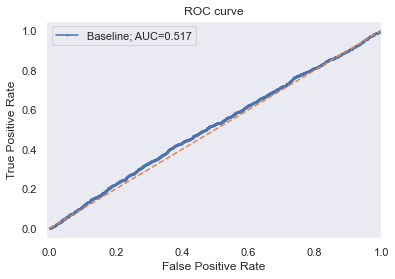

In [124]:
plot_roc(
    [holdout_data.get_label()],
    [model.predict_proba(holdout_data)[:,1]],
    ['Baseline']
)

The ROC curve above is for the validation dataset and the values come close to 50% which indicates that it is difficult to distinguish between train and test set and they come from the same distribution.


`So, in this case, our usual method for stratified train validation split should work fine and will perform equally well on the unseen test set`.